In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv("Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
167,15614827,Female,35,71000,0
322,15674331,Male,41,52000,0
141,15666141,Female,18,68000,0
234,15619407,Female,38,112000,0
397,15654296,Female,50,20000,1


## Analyzing the data

In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.corr

<bound method DataFrame.corr of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [34]:
df.duplicated().sum()

0

## Droping unnecessary columns

In [35]:
df=df.drop(columns='User ID')

In [36]:
df=df.drop(columns='Gender')

## Graphical representation of data

<Axes: xlabel='Age', ylabel='count'>

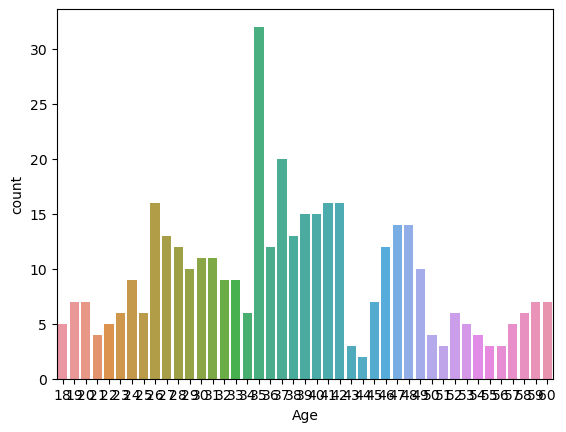

In [23]:
sns.countplot(x=df['Age'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

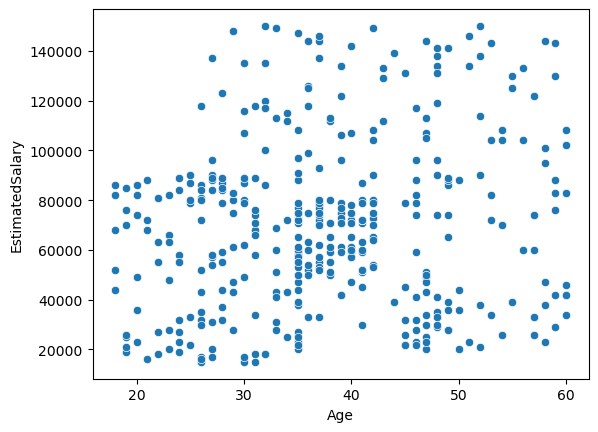

In [24]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df)

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

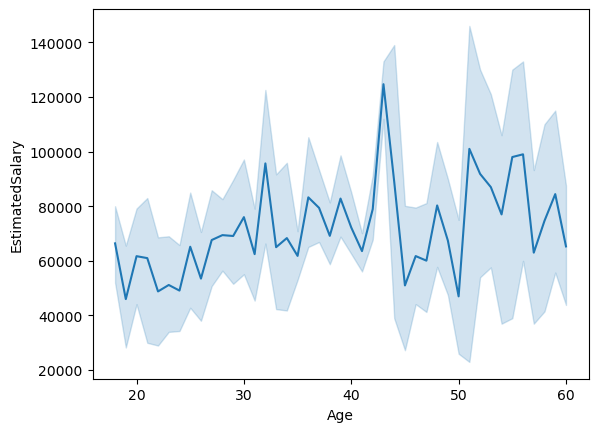

In [25]:
sns.lineplot(x='Age', y='EstimatedSalary', data=df)

In [37]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Train_Test_Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [40]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

## StandardScaler

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [44]:
# Standardscaler take dataframe as input but return numpy array, so now we have to convert this array into dataframe
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [47]:
X_train_scaled,X_test_scaled

(          Age  EstimatedSalary
 0   -1.163172        -1.584970
 1    2.170181         0.930987
 2    0.013305         1.220177
 3    0.209385         1.075582
 4    0.405465        -0.486047
 ..        ...              ...
 275  0.993704        -1.151185
 276 -0.869053        -0.775237
 277 -0.182774        -0.514966
 278 -1.065133        -0.457127
 279 -1.163172         1.393691
 
 [280 rows x 2 columns],
           Age  EstimatedSalary
 0   -0.771013         0.497201
 1    0.013305        -0.572804
 2   -0.280814         0.150172
 3   -0.771013         0.265849
 4   -0.280814        -0.572804
 ..        ...              ...
 115  1.091743        -0.139018
 116  0.699584         1.769639
 117 -0.672973         0.555039
 118  0.797624         0.352606
 119  0.895664        -0.543885
 
 [120 rows x 2 columns])

In [48]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [49]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


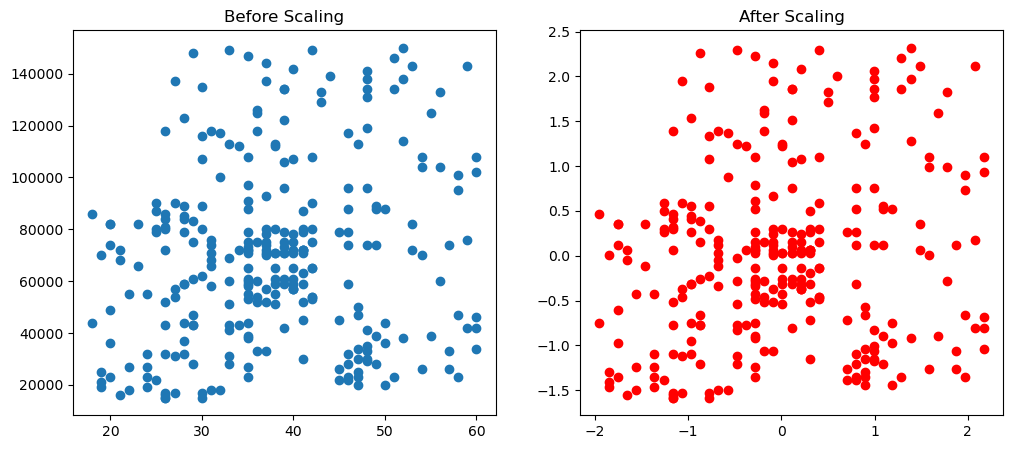

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## Training model on Decision Tree Algorithm

In [55]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

In [65]:
clf=DecisionTreeClassifier(max_depth=4,random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [66]:
y_pred=clf.predict(X_test)

In [67]:
# How accurate our model is?
print("accuracy score = ",np.round(accuracy_score(y_test,y_pred),2))

accuracy score =  0.91


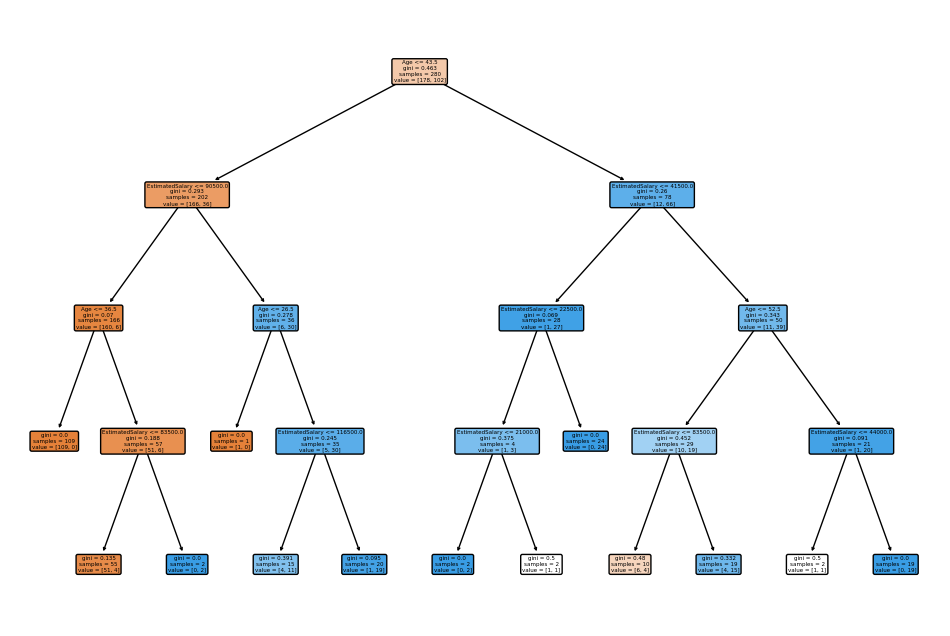

In [68]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True,rounded=True,feature_names=['Age','EstimatedSalary'])
plt.show()